# Lecture 23 Feature Engineering

https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html

All of the examples used in our class assume that you have numerical data in a tidy, [n_samples, n_features] format. In the real world, data rarely comes in such a form. With this in mind, one of the more important steps in using machine learning in practice is feature engineering: that is, taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix.

A few common examples of feature engineering tasks:

- features for representing categorical data
- features for representing text
- features for representing images
- features for increasing model complexity and imputation of missing data.

Often this process is known as vectorization, as it involves converting arbitrary data into well-behaved vectors.


## Categorical Features
One common type of non-numerical data is categorical data. For example, imagine you are exploring some data on housing prices, and along with numerical features like "price" and "rooms", you also have "neighborhood" information. For example, your data might look something like this:

In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Madison'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Middleton'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Fitchburg'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Middleton'}
]
data

[{'price': 850000, 'rooms': 4, 'neighborhood': 'Madison'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Middleton'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Fitchburg'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Middleton'}]

You might be tempted to encode this data with a straightforward numerical mapping:

In [2]:
{'Madison': 1, 'Middleton': 2, 'Fitchburg': 3};

It turns out that this is not generally a useful approach in Scikit-Learn: the package's models make the fundamental assumption that numerical features reflect algebraic quantities. Thus such a mapping would imply, for example, that Madison < Middleton < Fitchburg, or even that Fitchburg - Madison = Middleton, which (niche demographic jokes aside) does not make much sense.

In this case, one proven technique is to use one-hot encoding, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively. When your data comes as a list of dictionaries, Scikit-Learn's DictVectorizer will do this for you:

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec

DictVectorizer(dtype=<class 'int'>, sparse=False)

In [4]:
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     0,      0,      1, 700000,      3],
       [     1,      0,      0, 650000,      3],
       [     0,      0,      1, 600000,      2]])

Notice that the 'neighborhood' column has been expanded into three separate columns, representing the three neighborhood labels, and that each row has a 1 in the column associated with its neighborhood. With these categorical features thus encoded, you can proceed as normal with fitting a Scikit-Learn model.

To see the meaning of each column, you can inspect the feature names:

In [5]:
vec.get_feature_names_out()

array(['neighborhood=Fitchburg', 'neighborhood=Madison',
       'neighborhood=Middleton', 'price', 'rooms'], dtype=object)

There is one clear disadvantage of this approach: if your category has many possible values, this can greatly increase the size of your dataset. However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:

In [6]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)


<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [7]:
print(vec.fit_transform(data))

  (0, 1)	1
  (0, 3)	850000
  (0, 4)	4
  (1, 2)	1
  (1, 3)	700000
  (1, 4)	3
  (2, 0)	1
  (2, 3)	650000
  (2, 4)	3
  (3, 2)	1
  (3, 3)	600000
  (3, 4)	2


## Text Features
Another common need in feature engineering is to convert text to a set of representative numerical values. For example, most automatic mining of social media data relies on some form of encoding the text as numbers. One of the simplest methods of encoding data is by word counts: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

For example, consider the following set of three phrases:

In [8]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

For a vectorization of this data based on word count, we could construct a column representing the word "problem," the word "evil," the word "horizon," and so on. While doing this by hand would be possible, the tedium can be avoided by using Scikit-Learn's CountVectorizer:

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
print(X)

  (0, 3)	1
  (0, 2)	1
  (0, 0)	1
  (1, 0)	1
  (1, 4)	1
  (2, 3)	1
  (2, 1)	1


In [10]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


### example

In [12]:
from google.colab import drive
drive.mount('/content/drive')

filedir = '/content/drive/MyDrive/Teaching/FWE458_Spring2024/Lec23/'
fname = filedir + "SW_with_AOD_cat.csv"

import pandas as pd
df = pd.read_csv(fname)

X = df[['SZA', 'AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3', 'Pressure', 'BSA', 'WSA']]
y = df['SW_diffuse'] + df['SW_direct']
X

Mounted at /content/drive


,SZA,AOD,COD,CLD_FRAC,UW,TO3,Pressure,BSA,WSA
0,24.936783,Very High,2.440000,0.286546,2.021502,311.419861,959.085083,0.162,0.193
1,34.865055,Extremely High,4.630000,0.468832,4.859887,308.713379,968.427551,0.155,0.169
2,27.330978,Very High,2.030000,0.301414,5.278558,293.322052,988.040588,0.136,0.149
3,20.361732,Very High,5.500000,0.377019,4.856422,321.498199,977.610229,0.156,0.179
4,13.433228,Medium,0.736076,0.075378,0.644262,295.448975,882.321411,0.188,0.212
...,...,...,...,...,...,...,...,...,...
35219,49.830475,Very Low,0.439769,0.058022,1.228857,264.152802,882.321411,0.201,0.207
35220,63.000889,Very Low,0.050319,0.007686,1.791770,271.940308,1004.391907,0.170,0.169
35221,65.792831,Very Low,0.534811,0.080013,1.639937,270.028168,1002.365845,0.168,0.170
35222,67.391891,Medium,1.368286,0.218022,0.462143,265.180176,811.828369,0.192,0.183


In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,
                                  train_size=0.2)


from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200, max_depth=10)

forest.fit(Xtrain, ytrain)

ypred_train = forest.predict(Xtrain)
ypred_test = forest.predict(Xtest)

plt.scatter(ytest,ypred_test)

ValueError: could not convert string to float: 'Extremely Low'

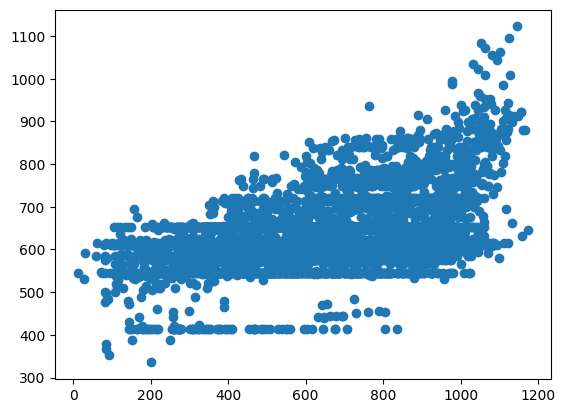

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
Xnew = enc.transform(X)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnew, y, random_state=0, train_size=0.2)


from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(10,max_depth=10)

forest.fit(Xtrain, ytrain)

ypred_train = forest.predict(Xtrain)
ypred_test = forest.predict(Xtest)

plt.scatter(ytrain,ypred_train)

In [15]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(X.AOD)
print(enc.classes_)

['Extremely High' 'Extremely Low' 'High' 'Low' 'Medium' 'Very High'
 'Very Low']


In [16]:
Xnew = X.copy()
Xnew.AOD = enc.transform(X.AOD)

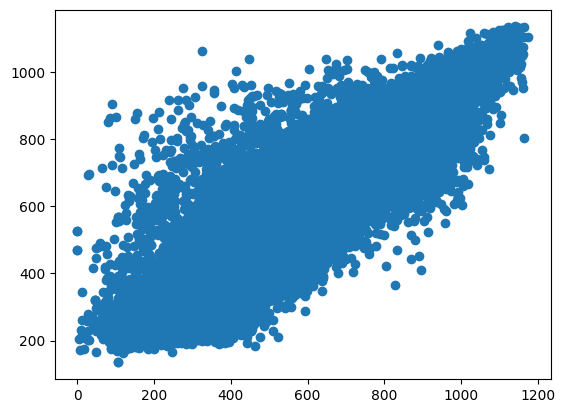

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnew, y, random_state=0, train_size=0.2)


from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(10,max_depth=10)

forest.fit(Xtrain, ytrain)

ypred_train = forest.predict(Xtrain)
ypred_test = forest.predict(Xtest)

plt.scatter(ytest,ypred_test)

## Derived Features
Another useful type of feature is one that is mathematically derived from some input features.

For example, this data clearly cannot be well described by a straight line:

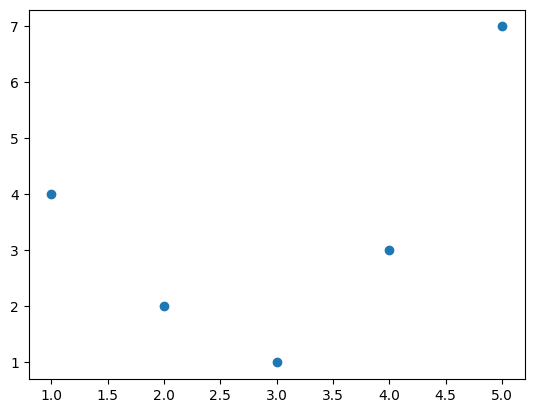

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

Still, we can fit a line to the data using LinearRegression and get the optimal result:

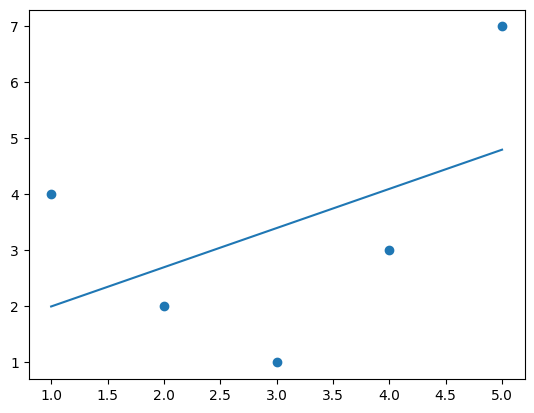

In [19]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

It's clear that we need a more sophisticated model to describe the relationship between x and y.

One approach to this is to transform the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data this way:

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


The derived feature matrix has one column representing x, and a second column representing $x^2$, and a third column representing $x^3$. Computing a linear regression on this expanded input gives a much closer fit to our data:

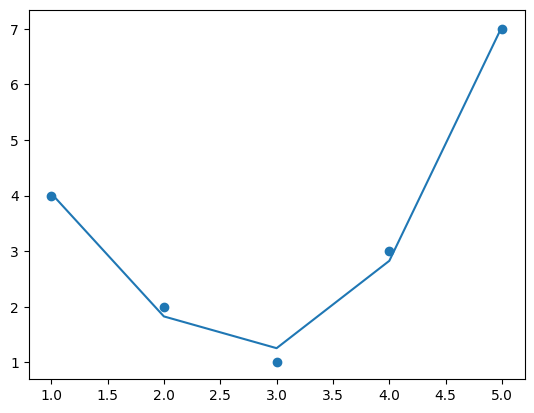

In [21]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

This idea of improving a model not by changing the model, but by transforming the inputs, is fundamental to many of the more powerful machine learning methods. More generally, this is one motivational path to the powerful set of techniques known as kernel methods

## Imputation of Missing Data

Another common need in feature engineering is handling of missing data. For example, we might have a dataset that looks like this:

In [22]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value. This is known as imputation of missing values, and strategies range from simple (e.g., replacing missing values with the mean of the column) to sophisticated (e.g., using matrix completion or a robust model to handle such data).

The sophisticated approaches tend to be very application-specific, and we won't dive into them here. For a baseline imputation approach, using the mean, median, or most frequent value, Scikit-Learn provides the Imputer class:

In [23]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

We see that in the resulting data, the two missing values have been replaced with the mean of the remaining values in the column. This imputed data can then be fed directly into, for example, a LinearRegression estimator:

In [24]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

## Feature Pipelines
With any of the preceding examples, it can quickly become tedious to do the transformations by hand, especially if you wish to string together multiple steps. For example, we might want a processing pipeline that looks something like this:

- Impute missing values using the mean
- Transform features to quadratic
- Fit a linear regression
To streamline this type of processing pipeline, Scikit-Learn provides a Pipeline object, which can be used as follows:

In [25]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


## Suggestions for feature engineering in machine learning practices:
- Understand the problem and the data: Before performing feature engineering, it's important to have a good understanding of the problem and the data. This includes understanding the domain, the objectives of the model, and the characteristics of the data.

- Handle missing values: Missing values are a common issue in real-world datasets. There are various techniques to handle missing values, such as imputation, deletion, and using special values or indicators.

- Encode categorical variables: Categorical variables need to be encoded as numerical values before they can be used as input in machine learning models. There are various techniques for encoding categorical variables, such as one-hot encoding, label encoding, and binary encoding.

- Scale numerical features: Scaling numerical features is important to ensure that they have similar ranges and magnitudes. This can help to improve the performance of certain machine learning models, such as those that use distance-based metrics.

- Create new features: Sometimes, the raw features may not be informative enough for the machine learning model to make accurate predictions. In such cases, creating new features by combining or transforming existing features can help to improve the performance of the model.

- Regularize features: Regularization techniques can be used to reduce the impact of certain features that may be noisy or irrelevant. This can help to improve the robustness and generalization of the model.

- Evaluate the impact of feature engineering: Finally, it's important to evaluate the impact of feature engineering on the performance of the machine learning model. This can be done by comparing the performance of the model before and after feature engineering, and using appropriate metrics such as accuracy, precision, recall, F1 score, or AUC-ROC.